<a href="https://colab.research.google.com/github/GuilhermePelegrina/Mackenzie/blob/main/Aulas/2025_1s/TIC/Aula_09_Series_temporais_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="left">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->

# **Séries Temporais I**

Uma série temporal é uma sequência de observações ou medidas feitas em um mesmo objeto ou fenômeno em intervalos de tempo igualmente espaçados. Essas observações são coletadas e registradas em função do tempo. Em outras palavras, uma série temporal é uma coleção de dados organizados ao longo do tempo, o que permite analisar tendências, padrões, sazonalidades e outros comportamentos que possam ocorrer em diferentes escalas de tempo.

<img src='https://raw.githubusercontent.com/guilhermepelegrina/Mackenzie/main/Aulas/Figuras/fig_series_temporais_1.png' width="600">

As séries temporais são amplamente usadas em várias disciplinas, como econometria, meteorologia, finanças, engenharia e muitas outras, para analisar e prever o comportamento de fenômenos que evoluem com o tempo. Elas desempenham um papel fundamental na modelagem estatística e na tomada de decisões com base no histórico de dados.

# Estacionariedade

A média e a variância de processos estacionários são constantes ao longo do tempo, intuitivamente isto significa que as observações se desenvolvem aleatoriamente entorno de um certo nível com variabilidade constante.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

In [12]:
# Séries temporais
df_1 = pd.read_csv("https://raw.githubusercontent.com/ejgao/Time-Series-Datasets/master/monthly-beer-production-in-austr.csv") #IBGE - Trimestral
df_1

,Month,Monthly beer production
0,1956-01,93.2
1,1956-02,96.0
2,1956-03,95.2
3,1956-04,77.1
4,1956-05,70.9
...,...,...
471,1995-04,127.0
472,1995-05,151.0
473,1995-06,130.0
474,1995-07,119.0


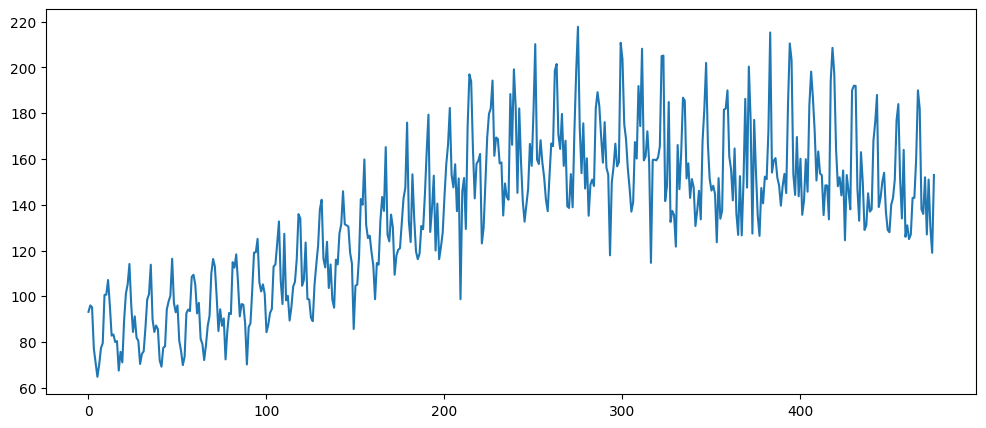

In [15]:
plt.figure(figsize=(12,5))
plt.plot(df_1['Monthly beer production'])

### Teste Augmented Dickey-Fuller (ADF)

O teste de Dickey-Fuller Aumentado (ADF) é um teste estatístico comumente usado para verificar a presença de uma tendência estocástica em uma série temporal.

$$H_0: \text{A série não é estacionária}$$
$$H_1: \text{A série é estacionária}$$

Se o valor-p for menor que um determinado nível de significância (geralmente 0,05), então rejeitamos a hipótese nula e concluímos que a série é estacionária, ou seja, não possui uma tendência estocástica significativa.

In [17]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df_1['Monthly beer production'])
print('p-value: %f' % result[1])

p-value: 0.177621


In [ ]:
#  Exportações
from statsmodels.tsa.stattools import adfuller

result = adfuller(df_2.Exportações)
print('p-value: %f' % result[1])

#Decomposição de séries temporais

A decomposição de uma série temporal é o processo de separar a série em diferentes componentes: tendência, sazonalidade e componente aleatório, isto permite a detecção de padrões, identificação de tendências e sazonalidades, e auxiliando na previsão de valores da série.

<img src='https://raw.githubusercontent.com/guilhermepelegrina/Mackenzie/main/Aulas/Figuras/fig_series_temporais_2.png' width="600">

*   **Tendência**  direção geral dos dados ao longo do tempo, indica se a série está aumentando, diminuindo ou permanecendo estável ao longo de um período de tempo.

*   **Sazonalidade** refere-se a padrões que se repetem em períodos fixos de tempo, como estações do ano, dias da semana ou meses.

*   **Componente aleatório (erro)**: representa a variabilidade não explicada pela tendência e sazonalidade.



# Australian beer production e Airline Passenger Numbers

Produção mensal de cerveja na Austrália: megalitros. Não inclui bebidas com teor alcoólico inferior a 1,15.

###1.  Verifique visualmente se as séries apresentam tendências e/ou sazonalidades

In [18]:
# Lendo os dados
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/ejgao/Time-Series-Datasets/master/monthly-beer-production-in-austr.csv")
df2 = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv")
df = df.iloc[48:252,:].reset_index(drop=True)

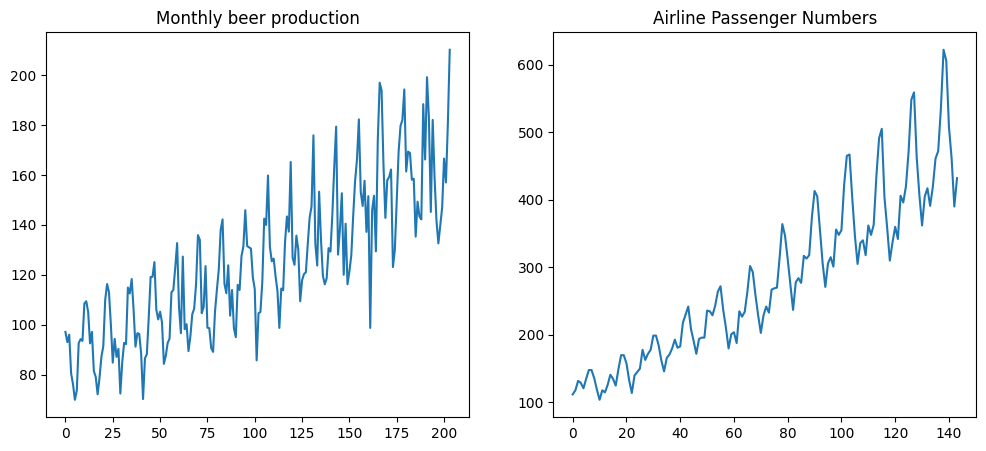

In [19]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(df["Monthly beer production"])
plt.title("Monthly beer production")

plt.subplot(1,2,2)
plt.plot(df2["Passengers"])
plt.title("Airline Passenger Numbers")

plt.show()

Observação:

*   **Monthly beer production:**
A variação sazonal parece constante; ela não muda quando o valor da série temporal aumenta. Devemos usar o modelo aditivo (`model='additive'`).
$Valor = Tendência +  Sazonalidade + Erro$

*   **Airline Passenger Numbers**
À medida que a série temporal aumenta em magnitude, a variação sazonal também aumenta. Nesse caso, devemos usar o modelo multiplicativo (`model='multiplicative'`). $ Valor = Tendência \times Sazonalidade \times Erro$



### 2. Faça uma análise descritiva da produção de cerveja por mês. Em qual mês a produção é maior e em qual é menor?

In [20]:
# Vamos ver o formato da base de dados!
df

,Month,Monthly beer production
0,1960-01,97.1
1,1960-02,93.0
2,1960-03,96.0
3,1960-04,80.5
4,1960-05,76.1
...,...,...
199,1976-08,147.0
200,1976-09,166.6
201,1976-10,157.0
202,1976-11,180.4


In [21]:
df[['Ano', 'Mês']] = df['Month'].apply(lambda x: pd.Series(x.split('-')))
df.drop("Month", axis=1, inplace=True)

In [24]:
df

,Monthly beer production,Ano,Mês
0,97.1,1960,01
1,93.0,1960,02
2,96.0,1960,03
3,80.5,1960,04
4,76.1,1960,05
...,...,...,...
199,147.0,1976,08
200,166.6,1976,09
201,157.0,1976,10
202,180.4,1976,11


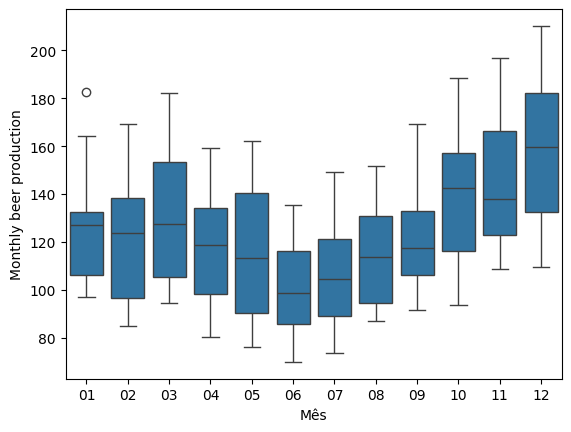

In [23]:
# Produção por mês!
sns.boxplot(x="Mês", y="Monthly beer production", data=df)
plt.show()

###3. Ajuste um modelo de regressão linear para a série produção de cerveja. Faça as previsões para o próximo ano. Comente!

In [28]:
# Vamos criar uma coluna com o tempo para ajustar o modelo de regressão

df["time"]=np.arange(len(df))
df

,Monthly beer production,Ano,Mês,time
0,97.1,1960,01,0
1,93.0,1960,02,1
2,96.0,1960,03,2
3,80.5,1960,04,3
4,76.1,1960,05,4
...,...,...,...,...
199,147.0,1976,08,199
200,166.6,1976,09,200
201,157.0,1976,10,201
202,180.4,1976,11,202


In [26]:
import statsmodels.formula.api as sm

model = sm.ols(formula='df["Monthly beer production"] ~ time', data=df)
result = model.fit()
print(result.summary())

                                  OLS Regression Results                                 
Dep. Variable:     df["Monthly beer production"]   R-squared:                       0.670
Model:                                       OLS   Adj. R-squared:                  0.668
Method:                            Least Squares   F-statistic:                     409.9
Date:                           Tue, 29 Apr 2025   Prob (F-statistic):           1.66e-50
Time:                                   23:01:59   Log-Likelihood:                -867.99
No. Observations:                            204   AIC:                             1740.
Df Residuals:                                202   BIC:                             1747.
Df Model:                                      1                                         
Covariance Type:                       nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------

In [29]:
# previsões 12 meses

new_times = pd.DataFrame()
new_times['time'] = np.arange(len(df), len(df) + 12)

In [30]:
new_times['prediction'] = result.predict(new_times)
new_times.head(12)

,time,prediction
0,204,166.793862
1,205,167.206207
2,206,167.618553
3,207,168.030899
4,208,168.443244
5,209,168.855590
6,210,169.267936
7,211,169.680281
8,212,170.092627
9,213,170.504973


In [31]:
df.tail()

,Monthly beer production,Ano,Mês,time
199,147.0,1976,08,199
200,166.6,1976,09,200
201,157.0,1976,10,201
202,180.4,1976,11,202
203,210.2,1976,12,203


<Axes: xlabel='time', ylabel='prediction'>

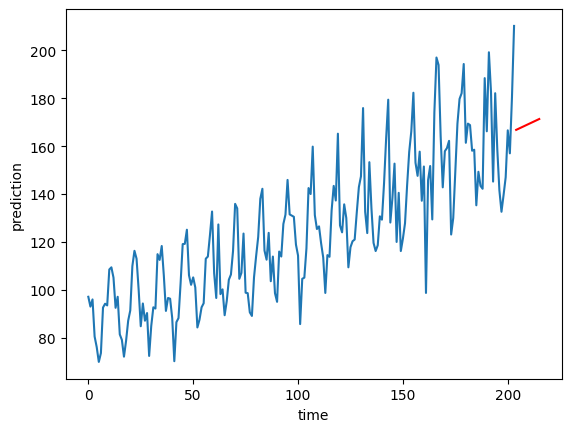

In [32]:
plt.plot(df["Monthly beer production"])
sns.lineplot(x='time', y='prediction', data=new_times, color='red')

### 4. Faça a decomposição da série. Comente!

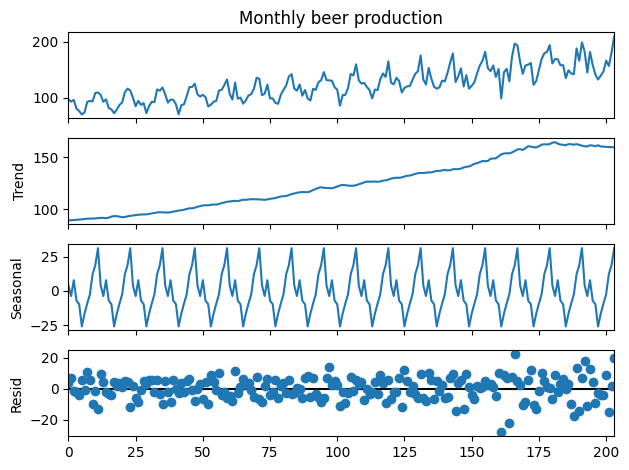

In [33]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition=seasonal_decompose(df["Monthly beer production"],
                                 model='additive',
                                 period=12,
                                 extrapolate_trend='freq')
decomposition.plot();

### 5. Analise os decompostos (tend+saz+resid) dos valores da série em janeiro e dezembro de 1961.

In [34]:
# Obter os componentes da decomposição

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

In [35]:
df["trend"]=trend
df["seasonal"]=seasonal
df["residual"]=residual

In [36]:
df.head(10)

,Monthly beer production,Ano,Mês,time,trend,seasonal,residual
0,97.1,1960,01,0,89.312811,4.066108,3.721081
1,93.0,1960,02,1,89.518973,-3.676411,7.157438
2,96.0,1960,03,2,89.725136,7.859501,-1.584637
3,80.5,1960,04,3,89.931299,-6.991597,-2.439702
4,76.1,1960,05,4,90.137461,-9.723822,-4.313639
5,69.9,1960,06,5,90.343624,-25.853351,5.409728
6,73.6,1960,07,6,90.700000,-16.513273,-0.586727
7,92.6,1960,08,7,91.012500,-9.129845,10.717345
8,94.2,1960,09,8,91.037500,-2.394702,5.557202
9,93.5,1960,10,9,91.120833,12.270834,-9.891667


In [37]:
df[(df.Ano=="1961") & (df.Mês=="01")]

,Monthly beer production,Ano,Mês,time,trend,seasonal,residual
12,105.1,1961,01,12,91.804167,4.066108,9.229725


In [38]:
df[(df.Ano=="1961") & (df.Mês=="12")]

,Monthly beer production,Ano,Mês,time,trend,seasonal,residual
23,113.0,1961,12,23,93.7625,31.25264,-12.01514


###6. Verifique estatísticamente se os resíduos obtidos da decomposição da série são estacionários. Use $\alpha=0,05$.

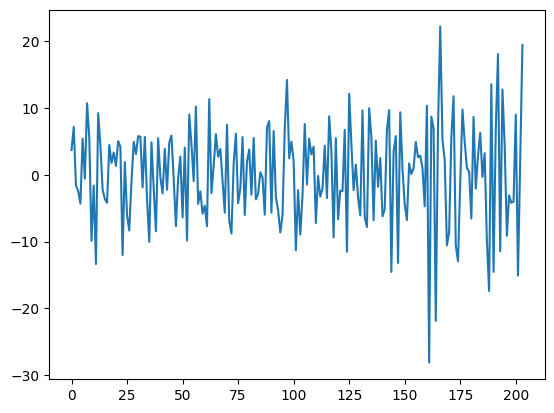

In [39]:
plt.plot(df.residual);

In [40]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df.residual)
print('p-value: %f' % result[1])

p-value: 0.000000


## Conjunto de dados - Equipamentos eletrônicos

Vamos, agora, fazer a mesma análsie de decomposição de série temporal utilizando dados sobre demanda de componentes eletrônicos. Note que, no arquivo que contém tal demanda, há três abas. Nas duas primeiras abas, há a demanda para um conjunto de itens. Na terceira aba, há as informações sobre lead time e lote mínimo.

Suponha que estamos interessados em analisar a demanda do item 5, que está na segunda aba dessa base de dados. Veja nos códigos abaixo como manipular essa base de dados para usar na análise de decomposição. Suponha, também, que esse arquivo esteja em sua máquina (não em alguma página online).

In [41]:
# Leitura dos dados e seleção da segunda aba

df = pd.read_excel('data_eletronicos.xlsx', sheet_name="Vendas Itens 5 a 8")
df

,Data,Item 5,item 6,item 7,item 8
0,2010-06-30,8.0,NaN,5.0,NaN
1,2010-07-01,NaN,NaN,NaN,NaN
2,2010-07-02,4.0,NaN,NaN,NaN
3,2010-07-05,NaN,NaN,2.0,NaN
4,2010-07-06,NaN,NaN,NaN,NaN
...,...,...,...,...,...
1449,2016-06-08,NaN,NaN,NaN,NaN
1450,2016-06-09,NaN,NaN,8.0,NaN
1451,2016-06-10,NaN,NaN,NaN,NaN
1452,2016-06-13,NaN,NaN,NaN,NaN


Repare que há muitos valores ausentes. Isso aconteceu porque não houve demanda naquele dia e, portanto, a célula ficou fazia.

Repare, também, que a coluna `Data` contém as informações sobre o tempo (ano-mês-dia). Uma facilidade quando trabalhamos com séries temporais em Python consiste em converter a coluna que indica o tempo para uma coluna do tipo `datetime` (ou seja, que o Python vai interpretar como uma coluna com informaçoes sobre o tempo) e, em seguida, converter essa coluna para os índices (das linhas) do DataFrame. Veja nos códigos abaixo.

In [42]:
# Convertendo a "Data" para datetime e definindo esta coluna como índices das linhas
df['Data'] = pd.to_datetime(df['Data'])
df.set_index('Data', inplace=True)
df

,Item 5,item 6,item 7,item 8
Data,,,,
2010-06-30,8.0,NaN,5.0,NaN
2010-07-01,NaN,NaN,NaN,NaN
2010-07-02,4.0,NaN,NaN,NaN
2010-07-05,NaN,NaN,2.0,NaN
2010-07-06,NaN,NaN,NaN,NaN
...,...,...,...,...
2016-06-08,NaN,NaN,NaN,NaN
2016-06-09,NaN,NaN,8.0,NaN
2016-06-10,NaN,NaN,NaN,NaN


Agora, podemos selecionar a coluna que interessa para a nossa análise (item 5). Vamos, também, fazer um gráfico para ilustrar a demanda diária ao longo do tempo.

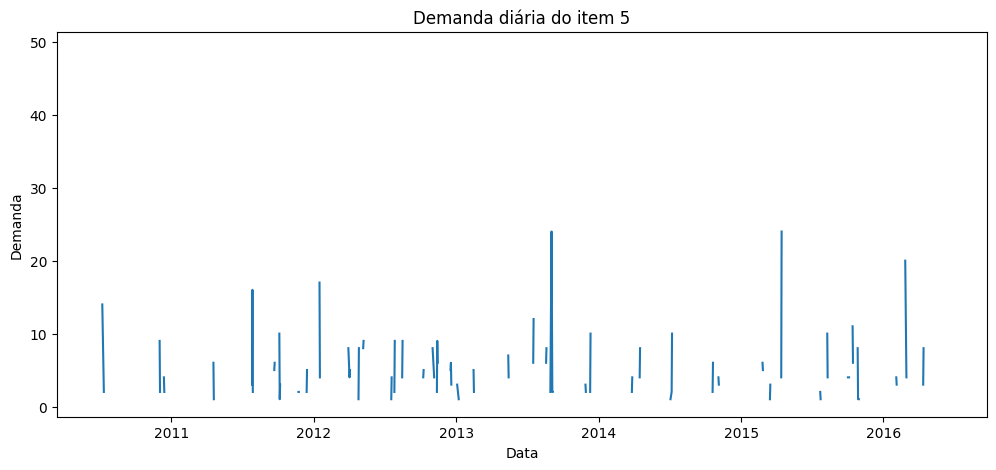

In [43]:
# Selecionando apenas a coluna 5

serie_diaria = df[['Item 5']]

# Plotando a série

plt.figure(figsize=(12,5))

plt.plot(serie_diaria)
plt.title("Demanda diária do item 5")
plt.xlabel('Data')
plt.ylabel('Demanda')
plt.show()

Note que esse gráfico não apresentou uma continuidade, uma vez que a série possui muitas células vazias. Nesse caso, poderíamos pensar em excluir as células vazias para, então, trabalhar com a série. Isso é feito no código a seguir.

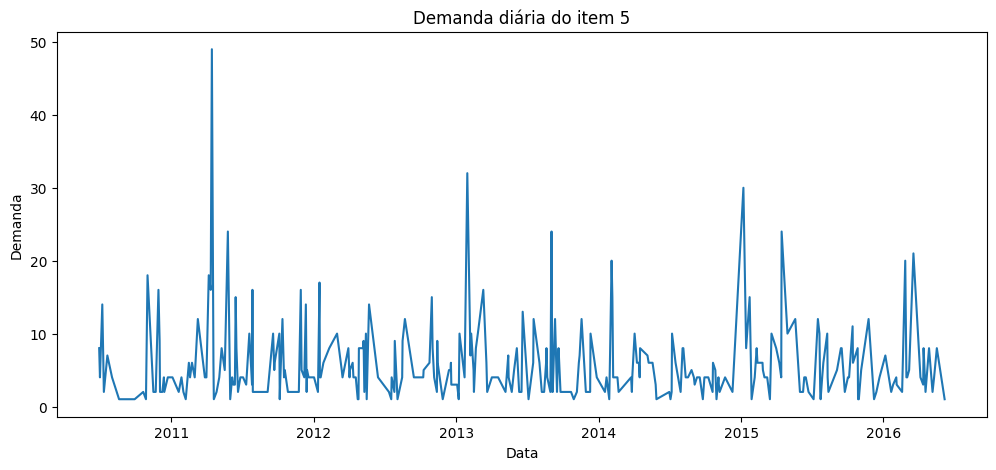

In [44]:
serie_diaria_2 = serie_diaria.dropna()

# Plotando a série

plt.figure(figsize=(12,5))

plt.plot(serie_diaria_2)
plt.title("Demanda diária do item 5")
plt.xlabel('Data')
plt.ylabel('Demanda')
plt.show()

In [45]:
serie_diaria_2

,Item 5
Data,
2010-06-30,8.0
2010-07-02,4.0
2010-07-08,14.0
2010-07-12,2.0
2010-07-21,7.0
...,...
2016-04-27,8.0
2016-05-06,2.0
2016-05-10,4.0


O gráfico, agora, apresenta uma continuidade. Porém, em termos de análise de uma série temporal, os dados (linhas) não estão igualmente espaçadas no tempo. Ou seja, ao remover linhas, não temos a garantia que haja o mesmo número de dias entre uma linha e outra (considerando todas na base de dados). E isso pode atrapalhar a nossa análise, principalmente usando métodos que leva em conta a caracaterística temporal.

Sendo assim, nessa base de dados, uma abordagem que pode ser feita é reorganizar esses dados de maneira a ter uma demanda mensal (a qual consiste na soma das demandas diárias) e, então, fazer a previsão. Veja como fazer esse ajuste nos códigos abaixo.

In [46]:
# Agrupando os dados mensais (somando as demanda diárias de cada mês)
serie_mensal = serie_diaria.resample('M').sum()
serie_mensal

,Item 5
Data,
2010-06-30,8.0
2010-07-31,27.0
2010-08-31,5.0
2010-09-30,1.0
2010-10-31,3.0
...,...
2016-02-29,33.0
2016-03-31,30.0
2016-04-30,25.0


Agora, como estamos fazendo uma análise mensal, faz sentido excluir os dados do mês de junho de 2010 e de 2016 (começo e fim do DataFrame), pois tínhamos poucos dados diários desses meses.

In [47]:
# Removendo os meses de junho de 2010 e junho de 2016
serie_mensal = serie_mensal.drop(pd.to_datetime(['2010-06-30', '2016-06-30']))
serie_mensal

,Item 5
Data,
2010-07-31,27.0
2010-08-31,5.0
2010-09-30,1.0
2010-10-31,3.0
2010-11-30,38.0
...,...
2016-01-31,12.0
2016-02-29,33.0
2016-03-31,30.0


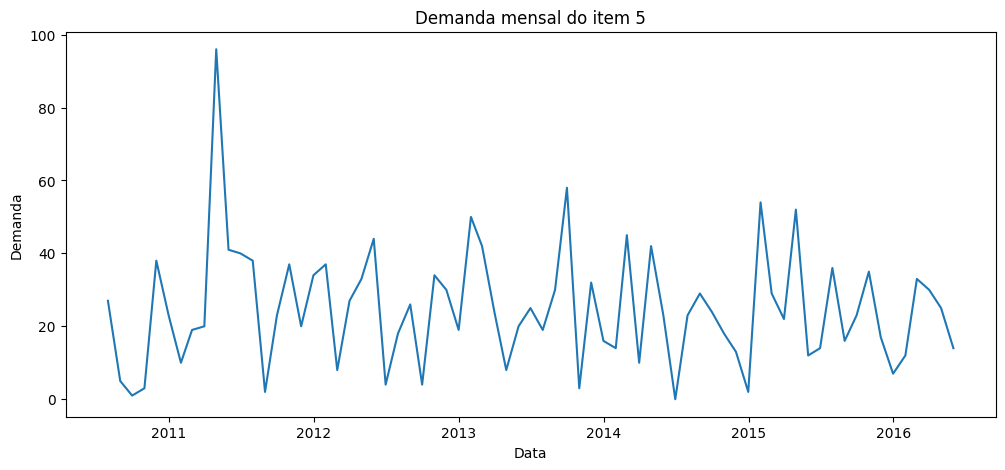

In [48]:
# Plotando a série

plt.figure(figsize=(12,5))

plt.plot(serie_mensal)
plt.title("Demanda mensal do item 5")
plt.xlabel('Data')
plt.ylabel('Demanda')
plt.show()

Agora, podemos partir para as análises de decomposição feitas como no exemplo anterior.

### Decomposição da série

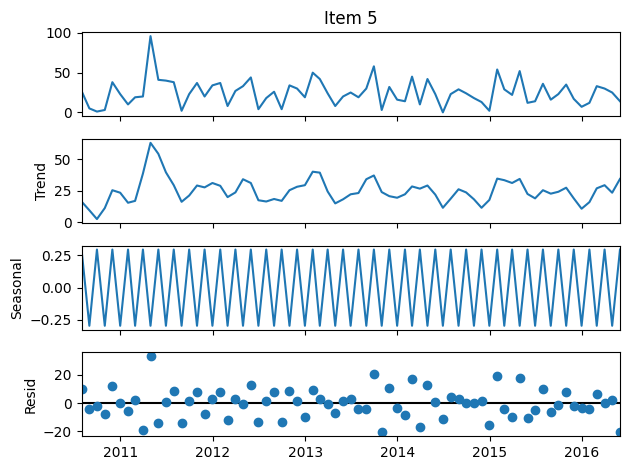

In [49]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition=seasonal_decompose(serie_mensal["Item 5"],
                                 model='additive',
                                 period=2,
                                 extrapolate_trend='freq')
decomposition.plot();

### Analise os decompostos (tend+saz+resid) dos valores da série.

In [50]:
# Obter os componentes da decomposição

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

In [52]:
serie_mensal["trend"]=trend
serie_mensal["seasonal"]=seasonal
serie_mensal["residual"]=residual

In [53]:
serie_mensal.head(10)

,Item 5,trend,seasonal,residual
Data,,,,
2010-07-31,27.0,16.50,0.294841,10.205159
2010-08-31,5.0,9.50,-0.294841,-4.205159
2010-09-30,1.0,2.50,0.294841,-1.794841
2010-10-31,3.0,11.25,-0.294841,-7.955159
2010-11-30,38.0,25.50,0.294841,12.205159
2010-12-31,23.0,23.50,-0.294841,-0.205159
2011-01-31,10.0,15.50,0.294841,-5.794841
2011-02-28,19.0,17.00,-0.294841,2.294841
2011-03-31,20.0,38.75,0.294841,-19.044841


### Verificação se os resíduos obtidos da decomposição da série são estacionários. Use $\alpha=0,05$.

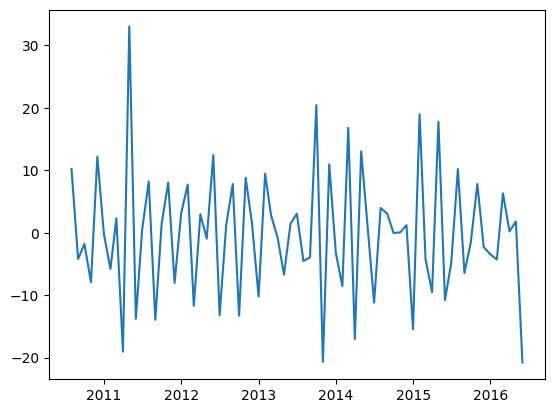

In [54]:
plt.plot(serie_mensal.residual);

In [55]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(serie_mensal.residual)
print('p-value: %f' % result[1])

p-value: 0.000001
